# Лабораторная работа №1
выполнил: Стрыгин Денис группа: 406
## Импорт необходимых библиотек

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Предобработка данных
Импорт датасетов

In [61]:
kc_house = pd.read_csv('kc_house_data.csv')
kc_house.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [123]:
p_c = pd.read_csv('petrol_consumption.csv')
p_c.head(5)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


Выбрал только реально значимые признаки, отобрав от категориальных

In [113]:
kc_house = kc_house[['price', 'bedrooms','bathrooms','sqft_living', 'sqft_lot', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15',	'sqft_lot15']]
kc_house = kc_house.dropna()
kc_house.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,3,7,1180.0,0,1340,5650
1,538000.0,3,2.25,2570,7242,3,7,2170.0,400,1690,7639
2,180000.0,2,1.00,770,10000,3,6,770.0,0,2720,8062
3,604000.0,4,3.00,1960,5000,5,7,1050.0,910,1360,5000
4,510000.0,3,2.00,1680,8080,3,8,1680.0,0,1800,7503


Привёл данные в необходимый для сети формат

In [140]:
x = kc_house.iloc[:, 1:].values
y = kc_house.iloc[:, :1].values
x1 = p_c[['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']]
y1 = p_c['Petrol_Consumption']

Построение графиков зависимостей (здесь сразу видно, что первый датасет плохо подходит для линейной регрессии из-за слабой линейной зависимости признаков)

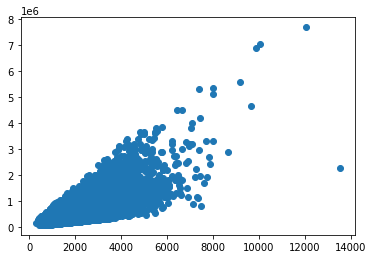

In [158]:
plt.scatter(kc_house['sqft_living'], kc_house['price'])

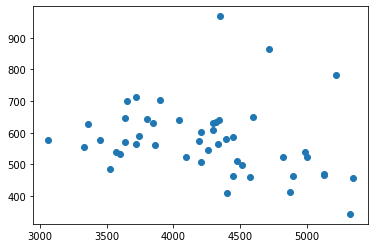

In [160]:
plt.scatter(p_c['Average_income'],p_c['Petrol_Consumption'])

Разбиваю выборку на тестовую и треннировочную

In [125]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8)
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, train_size = 0.8)

Создаю модели лнейной регрессии и обучаю их

In [157]:
model1 = LinearRegression()
model1.fit(x_train, y_train)
model2 = LinearRegression()
model2.fit(x_train1, y_train1)

LinearRegression()

Тестирую на тестовой выборке

In [153]:
y_pred = model1.predict(x_test)
y_pred1 = model2.predict(x_test1)

Оцениваю качество обучения на метриках

In [152]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 155677.80598042381
Mean Squared Error: 54336470627.82253
Root Mean Squared Error: 233101.8460412155


In [156]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))

Mean Absolute Error: 49.11851334129311
Mean Squared Error: 2959.1397162694093
Root Mean Squared Error: 54.39797529567998


## Вывод:
У первой модели вектор значений имеет меньшую линейную зависимоть от признаков, потому на метриках мы видим высокую ошибку. Вторая модель, хоть не отличилась высокой точность, всё же имеет небольшую абсолютную и среднеквадратичную ошибку из-за более точной аппроксимации точек прямой